<a href="https://colab.research.google.com/github/shilpathota/RecommendationSystem/blob/main/EnhancedRecommendationSystem_Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ✅ STEP 1: Install Google API Client (only needed once per session)
!pip install --quiet google-api-python-client

In [3]:
# ✅ STEP 2: Import libraries
import pandas as pd
from googleapiclient.discovery import build
import getpass

In [4]:
# ✅ STEP 3: Securely input API key
API_KEY = getpass.getpass('🔑 Enter your YouTube API key: ')
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"


🔑 Enter your YouTube API key: ··········


In [5]:
# ✅ STEP 4: Initialize API client
youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION, developerKey=API_KEY)


In [6]:
# ✅ STEP 5: Search YouTube videos by topic (age-specific query)
def search_youtube_videos(query="learning ABC", max_results=10):
    response = youtube.search().list(
        q=query,
        part="snippet",
        maxResults=max_results,
        type="video"
    ).execute()

    video_ids = [item['id']['videoId'] for item in response['items']]
    return video_ids


In [7]:
# ✅ STEP 6: Get metadata for a list of video IDs
def get_video_metadata(video_ids):
    response = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        id=",".join(video_ids)
    ).execute()

    video_data = []
    for item in response['items']:
        video_data.append({
            'video_id': item['id'],
            'title': item['snippet']['title'],
            'description': item['snippet'].get('description', ''),
            'channel_title': item['snippet']['channelTitle'],
            'tags': item['snippet'].get('tags', []),
            'published_at': item['snippet']['publishedAt'],
            'view_count': item['statistics'].get('viewCount', 0),
            'like_count': item['statistics'].get('likeCount', 0),
            'comment_count': item['statistics'].get('commentCount', 0),
        })
    return video_data

In [8]:
# ✅ STEP 7: Run the Search + Fetch
query = "nursery rhymes for toddlers"
video_ids = search_youtube_videos(query, max_results=15)
video_metadata = get_video_metadata(video_ids)


In [9]:
# ✅ STEP 8: Save to CSV or show dataframe
df = pd.DataFrame(video_metadata)
df.to_csv("youtube_kids_data.csv", index=False)
df.head()

,video_id,title,description,channel_title,tags,published_at,view_count,like_count,comment_count
0,5gZOYKHXwyQ,Nursery Rhymes for Kids | Songs Compilation - ...,Itsy Bitsy Spider and many more children songs...,Twinkle Little Songs - Nursery Rhymes,"[nursery rhymes, songs for kids, children song...",2019-07-26T16:15:17Z,66574634,130372,0
1,LrAtBtQnvCE,Five Little Ducks + More | Kids Songs and Nurs...,Get the Super Simple App! ► http://bit.ly/TheS...,Super Simple Songs - Kids Songs,"[Five Little Ducks, children's songs, Nursery ...",2016-10-08T15:30:00Z,153677235,196925,0
2,e_04ZrNroTo,Wheels on the Bus | @CoComelon Nursery Rhymes ...,Bounce along in the bus all over town with thi...,Cocomelon - Nursery Rhymes,"[preschool, toddler, children songs, abckidtv,...",2018-05-24T07:00:02Z,7519571173,19720765,0
3,0n_J2z-ILXo,Humpty Dumpty | + More Kids Songs | Super Simp...,Get the Super Simple App! ► http://bit.ly/TheS...,Super Simple Songs - Kids Songs,"[kids songs, humpty dumpty, humpty dumpty kids...",2017-11-04T15:30:00Z,110767734,159134,0
4,buE6l32rCHo,Incy Wincy Spider and More Nursery Rhymes for ...,Watch cute Incy Wincy Spider in this Itsy Bits...,Toddler Fun Learning,"[itsy bitsy spider, itsy bitsy spider nursery ...",2015-05-01T11:00:00Z,54762753,74005,0


In [10]:
import base64
import json
import requests

# 🔐 Securely input GitHub token
github_token = getpass.getpass('🔐 Enter your GitHub token: ')

# 🔗 GitHub repo details
GITHUB_USERNAME = "shilpathota"
REPO_NAME = "RecommendationSystem"
FILE_PATH = "data/youtube_kids_data.csv"  # path inside the repo
COMMIT_MESSAGE = "Add latest YouTube kids metadata"

# 📤 Read the CSV content
with open("youtube_kids_data.csv", "rb") as file:
    content = file.read()
    encoded_content = base64.b64encode(content).decode("utf-8")

# 🧠 GitHub API URL
url = f"https://api.github.com/repos/{GITHUB_USERNAME}/{REPO_NAME}/contents/{FILE_PATH}"

# Check if file exists to determine PUT or PATCH
response = requests.get(url, headers={"Authorization": f"token {github_token}"})
if response.status_code == 200:
    sha = response.json()['sha']  # Needed for update
else:
    sha = None

# 📤 Upload the file (create or update)
data = {
    "message": COMMIT_MESSAGE,
    "content": encoded_content,
    "branch": "main"
}
if sha:
    data["sha"] = sha

response = requests.put(url, headers={"Authorization": f"token {github_token}"}, data=json.dumps(data))

if response.status_code in [200, 201]:
    print("✅ File pushed to GitHub!")
else:
    print("❌ Failed to push:", response.json())


🔐 Enter your GitHub token: ··········
✅ File pushed to GitHub!


In [11]:
import pandas as pd

# Define the age-query mapping
mapping_data = [
    {"query": "nursery rhymes for toddlers", "age_min": 3, "age_max": 5, "category": "Music"},
    {"query": "learning ABC for preschoolers", "age_min": 3, "age_max": 5, "category": "Education"},
    {"query": "colors and shapes for kids", "age_min": 3, "age_max": 5, "category": "Education"},
    {"query": "science for kids age 6 to 8", "age_min": 6, "age_max": 8, "category": "Science"},
    {"query": "math games for kids", "age_min": 6, "age_max": 8, "category": "Math"},
    {"query": "bedtime stories for kids", "age_min": 6, "age_max": 8, "category": "Storytelling"},
    {"query": "coding for kids age 9", "age_min": 9, "age_max": 12, "category": "Programming"},
    {"query": "solar system for kids", "age_min": 9, "age_max": 12, "category": "Space/Science"},
    {"query": "how to draw for kids", "age_min": 9, "age_max": 12, "category": "Arts & Crafts"},
    {"query": "STEM activities for kids", "age_min": 9, "age_max": 12, "category": "STEM"},
]

# Convert to DataFrame and save
mapping_df = pd.DataFrame(mapping_data)
mapping_df.to_csv("age_query_mapping.csv", index=False)

print("✅ Mapping CSV created successfully!")
mapping_df


✅ Mapping CSV created successfully!


,query,age_min,age_max,category
0,nursery rhymes for toddlers,3,5,Music
1,learning ABC for preschoolers,3,5,Education
2,colors and shapes for kids,3,5,Education
3,science for kids age 6 to 8,6,8,Science
4,math games for kids,6,8,Math
5,bedtime stories for kids,6,8,Storytelling
6,coding for kids age 9,9,12,Programming
7,solar system for kids,9,12,Space/Science
8,how to draw for kids,9,12,Arts & Crafts
9,STEM activities for kids,9,12,STEM


In [12]:
import base64
import json
import requests
import getpass

# 🔐 Enter your GitHub token
github_token = getpass.getpass('🔐 Enter your GitHub token: ')

# GitHub repository info
GITHUB_USERNAME = "shilpathota"  # 👈 change this
REPO_NAME = "RecommendationSystem"            # 👈 change this
FILE_PATH = "data/age_query_mapping.csv"  # 👈 path inside repo
COMMIT_MESSAGE = "Add age-query mapping CSV"

# Read CSV file and encode
with open("age_query_mapping.csv", "rb") as file:
    content = file.read()
    encoded_content = base64.b64encode(content).decode("utf-8")

# Check if file already exists to get its SHA
url = f"https://api.github.com/repos/{GITHUB_USERNAME}/{REPO_NAME}/contents/{FILE_PATH}"
headers = {"Authorization": f"token {github_token}"}
response = requests.get(url, headers=headers)

sha = response.json()['sha'] if response.status_code == 200 else None

# Prepare PUT request
data = {
    "message": COMMIT_MESSAGE,
    "content": encoded_content,
    "branch": "main"
}
if sha:
    data["sha"] = sha

response = requests.put(url, headers=headers, data=json.dumps(data))

# Status output
if response.status_code in [200, 201]:
    print("✅ age_query_mapping.csv pushed to GitHub!")
else:
    print("❌ Failed to push:", response.json())


🔐 Enter your GitHub token: ··········
✅ age_query_mapping.csv pushed to GitHub!


In [13]:
import pandas as pd

mapping_df = pd.read_csv("age_query_mapping.csv")


In [14]:
#Get queries for user age
import random

def get_queries_for_age(age, n_queries=2):
    matches = mapping_df[(mapping_df['age_min'] <= age) & (mapping_df['age_max'] >= age)]
    return random.sample(matches['query'].tolist(), k=min(n_queries, len(matches)))


In [15]:
#Fetch YouTube Videos for Each Query
def get_videos_for_age(age):
    queries = get_queries_for_age(age)
    all_video_data = []

    for q in queries:
        print(f"🔎 Searching for: {q}")
        ids = search_youtube_videos(q, max_results=10)
        metadata = get_video_metadata(ids)
        all_video_data.extend(metadata)

    return all_video_data


In [16]:
#Recommend Top N Videos
def recommend_for_age(age, top_n=5):
    videos = get_videos_for_age(age)
    df = pd.DataFrame(videos)

    # Example: Sort by view_count
    df['view_count'] = df['view_count'].astype(int)
    recommended = df.sort_values(by="view_count", ascending=False).head(top_n)

    return recommended[['title', 'channel_title', 'view_count', 'published_at']]


In [17]:
user_age = int(input("Enter child’s age: "))
recommendations = recommend_for_age(user_age)

print("🎉 Top Recommendations:")
print(recommendations)


Enter child’s age: 6
🔎 Searching for: science for kids age 6 to 8
🔎 Searching for: math games for kids
🎉 Top Recommendations:
                                                title  \
13  "Math Whiz!" Addition Song  /// Danny Go! Kids...   
2       Walking Water Science Experiments for Kids!!!   
10  Addition and Subtraction with Dinosaurs - Math...   
6    TOP DIY Science Projects for Kids to do at home!   
1   Top 5 Easy Science Experiments for kids to do ...   

                channel_title  view_count          published_at  
13                  Danny Go!    39621981  2022-10-10T11:00:33Z  
2                Ryan's World    13969235  2019-09-14T12:00:09Z  
10  Smile and Learn - English    12105555  2020-06-25T15:30:03Z  
6                Ryan's World    11447750  2023-05-22T13:00:43Z  
1                Ryan's World     8400018  2022-02-08T13:00:32Z  


# Enhacing the recommendation System to provide recommendation based on parent's input

In [18]:
# Modify Query Filter System

def get_queries_for_age_and_subject(age, subject=None, n_queries=2):
    subset = mapping_df[
        (mapping_df['age_min'] <= age) &
        (mapping_df['age_max'] >= age)
    ]

    if subject:
        subset = subset[subset['category'].str.lower().str.contains(subject.lower())]

    if subset.empty:
        print("⚠️ No queries found for this subject at this age. Showing general results.")
        subset = mapping_df[(mapping_df['age_min'] <= age) & (mapping_df['age_max'] >= age)]

    return random.sample(subset['query'].tolist(), k=min(n_queries, len(subset)))


In [19]:
# Updating Recommendation Function
def recommend_for_age_and_subject(age, subject=None, top_n=5):
    queries = get_queries_for_age_and_subject(age, subject)
    all_videos = []

    for q in queries:
        print(f"🔎 Searching: {q}")
        video_ids = search_youtube_videos(q, max_results=10)
        all_videos.extend(get_video_metadata(video_ids))

    df = pd.DataFrame(all_videos)
    df['view_count'] = df['view_count'].astype(int)
    return df.sort_values(by="view_count", ascending=False).head(top_n)


In [20]:
age = int(input("Enter child’s age: "))
subject = input("Enter a preferred subject (e.g., Science, Geography, Math): ")

recommendations = recommend_for_age_and_subject(age, subject)
recommendations[['title', 'channel_title', 'view_count']]

Enter child’s age: 6
Enter a preferred subject (e.g., Science, Geography, Math): Math
🔎 Searching: math games for kids


,title,channel_title,view_count
3,"""Math Whiz!"" Addition Song /// Danny Go! Kids...",Danny Go!,39621981
0,Addition and Subtraction with Dinosaurs - Math...,Smile and Learn - English,12105555
1,Maths Kids By RV AppStudios [English],Toddler Learning Videos For Kids - Lucas & Fri...,7232768
6,20 Math Quiz for Kids | One Digit Addition Quiz,Math Quiz for Kids,995497
4,Sorting and Matching Games | Basic Math for Ki...,Kids Academy,472886


## Phase 2 - Enhance existing popularity-based logic to make it smarter and more tailored to children

In [21]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Sample data
titles = ["ABC Song", "Counting Stars", "Fairy Tale", "Learn Colors", "Dinosaur Facts"]
tags_list = [["music", "abc"], ["math", "numbers"], ["story", "fairy"], ["colors", "learning"], ["science", "dinosaurs"]]
content_types = ["music", "educational", "storytelling"]
age_groups = ["3-5", "6-8"]

data = []
for i in range(100):
    title = random.choice(titles)
    tags = random.choice(tags_list)
    view_count = random.randint(1000, 100000)
    like_count = random.randint(100, 10000)
    watch_time = random.randint(10, 300)
    upload_date = datetime.now() - timedelta(days=random.randint(0, 365))
    age_group = random.choice(age_groups)
    content_type = random.choice(content_types)
    data.append({
        "video_id": f"vid_{i}",
        "title": title,
        "tags": ", ".join(tags),
        "view_count": view_count,
        "like_count": like_count,
        "watch_time_minutes": watch_time,
        "upload_date": upload_date.date(),
        "age_group": age_group,
        "content_type": content_type
    })

df = pd.DataFrame(data)
df.to_csv("synthetic_kids_videos.csv", index=False)



### Compute Engagement Score which is including like and watch time

In [22]:
def compute_engagement_score(df):
    # Normalize individual columns
    df["views_norm"] = df["view_count"] / df["view_count"].max()
    df["likes_norm"] = df["like_count"] / df["like_count"].max()
    df["watch_time_norm"] = df["watch_time_minutes"] / df["watch_time_minutes"].max()

    # Weighted score
    df["engagement_score"] = (
        0.4 * df["views_norm"] +
        0.3 * df["likes_norm"] +
        0.3 * df["watch_time_norm"]
    )

    return df

df = compute_engagement_score(df)

Boost recent videos — newer videos will get a bonus score.


In [23]:
from datetime import datetime

def add_recentness_boost(df, weight=0.2):
    today = pd.to_datetime(datetime.today().date())  # Convert to datetime64
    df["upload_date"] = pd.to_datetime(df["upload_date"])  # Ensure datetime format
    df["days_old"] = (today - df["upload_date"]).dt.days
    df["recency_score"] = 1 / (1 + df["days_old"])
    df["final_score"] = df["engagement_score"] + weight * df["recency_score"]
    return df

df = add_recentness_boost(df)


In [24]:
## Filter by kids profile
kid_profile = {
    "age_group": "3-5",
    "preferred_types": ["math", "music"]
}

def filter_for_kid(df, profile):
    return df[
        (df["age_group"] == profile["age_group"]) &
        (df["content_type"].isin(profile["preferred_types"]))
    ]

df_kid_filtered = filter_for_kid(df, kid_profile)
df_kid_filtered.shape


(7, 16)

In [25]:
## REcommend Top - N videos
def recommend_top_n(df_filtered, n=5):
    return df_filtered.sort_values("final_score", ascending=False).head(n)

top_recommendations = recommend_top_n(df_kid_filtered)
print(top_recommendations[["title", "final_score"]])


             title  final_score
76  Dinosaur Facts     0.893327
38        ABC Song     0.759590
14  Dinosaur Facts     0.626554
63  Dinosaur Facts     0.541251
61  Dinosaur Facts     0.468655


## Summary
Built a composite score = views + likes + watch time + recency

Filtered content based on age and type

Delivered final Top-N recommendations with improved ranking

# Phase 2: Content-Based Similarity (TF-IDF)

In [26]:
## Goal: Recommend videos similar in title/tags to videos the child watched recently.

### Step 1: Choose a Reference Video (or Session History)
#### You can either:Pick 1–3 videos the child watched (manually for now)
#### Later use session history tracking

# Simulating that the child last watched these videos:
watched_titles = ["ABC Song", "Dinosaur Facts"]

In [27]:

### Step 2: Prepare the Data for TF-IDF
#### We'll combine title + tags for each video to get a better representation.

df["text"] = df["title"] + " " + df["tags"]

In [28]:
### Step 3: Apply TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["text"])

In [29]:



### Step 4: Find Similar Videos to Watched Ones
import numpy as np

def get_similar_videos(df, watched_titles, tfidf_matrix, top_n=5):
    watched_indices = df[df["title"].isin(watched_titles)].index.tolist()

    if not watched_indices:
        print("⚠️ No watched titles found in dataset.")
        return pd.DataFrame()

    # Compute the mean vector for watched videos
    watched_vector = tfidf_matrix[watched_indices].mean(axis=0)
    watched_vector = np.asarray(watched_vector)  # 👈 FIXED: Convert to ndarray

    similarity_scores = cosine_similarity(watched_vector, tfidf_matrix).flatten()

    df["similarity_score"] = similarity_scores
    recommended = df[~df["title"].isin(watched_titles)].sort_values("similarity_score", ascending=False).head(top_n)
    return recommended[["video_id", "title", "similarity_score", "age_group", "content_type"]]


In [30]:
### Step 5: Call the Recommender
recommendations = get_similar_videos(df, watched_titles, tfidf_matrix, top_n=5)
print(recommendations)

### Personalized recommendations based on video content

### Can work even if view count is low

### Easy to combine with previous scoring later (hybrid)

   video_id         title  similarity_score age_group  content_type
23   vid_23  Learn Colors          0.340517       6-8  storytelling
35   vid_35  Learn Colors          0.340517       6-8  storytelling
12   vid_12  Learn Colors          0.340517       3-5         music
66   vid_66  Learn Colors          0.340517       6-8  storytelling
40   vid_40    Fairy Tale          0.288332       6-8         music


You benefit from both:

🔍 Content similarity: personalization (based on what the child watched)

🔥 Engagement score: popularity/quality (based on views, likes, etc.)

In [31]:
# Step 1: Ensure both scores exist in your DataFrame

## final_score = α * similarity_score + β * engagement_score
## α = 0.6 (weight for similarity)
## β = 0.4 (weight for engagement)

##  Step 1: Ensure both scores exist in your DataFrame

df["engagement_score"]  # from Phase 1
df["similarity_score"]  # from Phase 2



,similarity_score
0,0.080100
1,0.660312
2,0.609020
3,0.185990
4,0.156190
...,...
95,0.255764
96,0.285741
97,0.080100
98,0.202981


In [32]:
## Step 2: Compute the hybrid score
def compute_hybrid_score(df, alpha=0.6, beta=0.4):
    df["hybrid_score"] = (
        alpha * df["similarity_score"].fillna(0) +
        beta * df["engagement_score"].fillna(0)
    )
    return df

df = compute_hybrid_score(df)


In [33]:
## Step 3: Recommend Top-N Based on Hybrid Score

def recommend_hybrid(df, watched_titles, top_n=5):
    return df[~df["title"].isin(watched_titles)].sort_values("hybrid_score", ascending=False).head(top_n)

hybrid_recommendations = recommend_hybrid(df, watched_titles)
print(hybrid_recommendations[["title", "hybrid_score", "similarity_score", "engagement_score"]])


             title  hybrid_score  similarity_score  engagement_score
35    Learn Colors      0.549901          0.340517          0.863977
28    Learn Colors      0.497790          0.266468          0.844774
56    Learn Colors      0.450322          0.285741          0.697194
70  Counting Stars      0.438522          0.185990          0.817320
51      Fairy Tale      0.422897          0.221172          0.725486


In [34]:
import plotly.express as px

def visualize_recommendations_interactive(df, watched_titles):
    df_filtered = df[~df["title"].isin(watched_titles)].copy()

    fig = px.scatter(
        df_filtered,
        x="similarity_score",
        y="engagement_score",
        size="hybrid_score",
        color="content_type",
        hover_name="title",
        size_max=40,
        title="📊 Interactive Video Recommendation Map (Similarity vs Engagement)",
        labels={
            "similarity_score": "Similarity to Watched Videos",
            "engagement_score": "Engagement Score",
            "content_type": "Content Type"
        }
    )
    fig.update_layout(
        legend=dict(x=1.05, y=1),
        margin=dict(l=40, r=40, t=60, b=40)
    )
    fig.show()

# Usage
visualize_recommendations_interactive(df, watched_titles)


# Phase 3 - Add Feedback input simulation



In [35]:
  # Add Feedback Input Simulation (or real feedback later)
  feedback_log = [
    {"title": "Exploring the Solar System", "watched": True},
    {"title": "Fun with Multiplication Tables", "watched": False},
    {"title": "Jungle Animals Adventure", "watched": True},
    {"title": "Learning Fractions", "watched": False},
]


In [36]:
# Add subject mapping which is keyword to subject mapper

subject_keywords = {
    "Math": ["multiplication", "fractions", "numbers", "math"],
    "Science": ["jungle", "animal", "experiment"],
    "Space": ["solar", "planet", "moon", "space"],
    "English": ["alphabet", "phonics", "rhymes"]
}

def extract_subject(title):
    title = title.lower()
    for subject, keywords in subject_keywords.items():
        if any(kw in title for kw in keywords):
            return subject
    return "Other"


In [37]:
# Analyze Interests from Feedback
from collections import defaultdict

def analyze_interests(feedback_log):
    profile = defaultdict(int)
    for item in feedback_log:
        subject = extract_subject(item["title"])
        profile[subject] += 1 if item["watched"] else -1
    return dict(profile)

interest_profile = analyze_interests(feedback_log)
print("Interest profile:", interest_profile)


Interest profile: {'Space': 1, 'Math': -2, 'Science': 1}


In [38]:
# Store the profile in json
import json
with open("interest_profile.json", "w") as f:
    json.dump(interest_profile, f)


In [39]:
# Step 2: Rerank Recommendations Based on Interests

def rerank_recommendations(recommendations, interest_profile):
    def score(item):
        subject = extract_subject(item["title"])
        return interest_profile.get(subject, 0)  # Higher score = higher priority
    return sorted(recommendations, key=score, reverse=True)

In [41]:
# Integrate with Recommendation Output

recommendations = [
    {"title": "Counting with Dinosaurs"},
    {"title": "A Trip to the Moon"},
    {"title": "Fun Jungle Safari"},
    {"title": "Multiplication Challenge"}
]

reranked_recommendations = rerank_recommendations(recommendations, interest_profile)
print("Reranked:", [video["title"] for video in reranked_recommendations])


Reranked: ['A Trip to the Moon', 'Fun Jungle Safari', 'Counting with Dinosaurs', 'Multiplication Challenge']


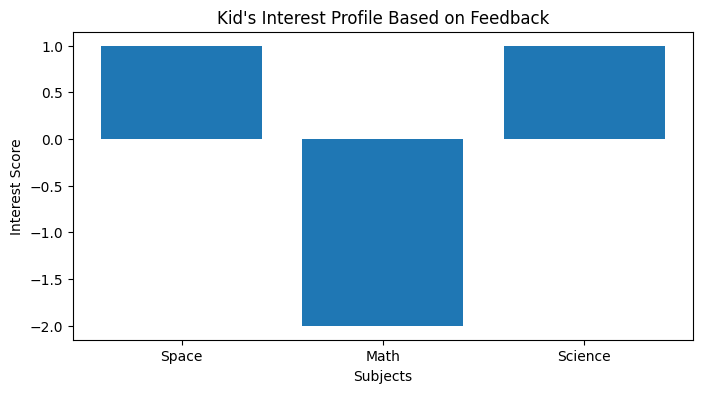

In [40]:
# Visualize the reranking

import matplotlib.pyplot as plt

def plot_interest_profile(profile):
    subjects = list(profile.keys())
    scores = [profile[s] for s in subjects]

    plt.figure(figsize=(8,4))
    plt.bar(subjects, scores)
    plt.title("Kid's Interest Profile Based on Feedback")
    plt.xlabel("Subjects")
    plt.ylabel("Interest Score")
    plt.show()

plot_interest_profile(interest_profile)


In [41]:
#  Step 3 - Add an Agent to Automate Feedback Analysis + Reranking
!pip install -U langgraph langchain langchain-core langchain-community langchain-groq


In [42]:
!pip install -U langgraph



In [55]:
from typing import TypedDict, List, Dict
from getpass import getpass
from langchain_groq import ChatGroq
from langgraph.graph import StateGraph

In [43]:
groq_api_key = getpass("🔐 Enter your Groq API key: ")

llm = ChatGroq(
    api_key=groq_api_key,
    model_name="mixtral-8x7b-32768"  # also supports llama3-70b-8192
)

🔐 Enter your Groq API key: ··········


In [47]:
class RecommenderState(TypedDict):
    feedback_log: List[Dict]
    recommendations: List[Dict]
    interest_profile: Dict[str, int]

In [56]:
subject_keywords = {
    "Math": ["multiplication", "fractions", "numbers", "math"],
    "Science": ["jungle", "animal", "experiment"],
    "Space": ["solar", "planet", "moon", "space"],
    "English": ["alphabet", "phonics", "rhymes"]
}

def extract_subject(title):
    title = title.lower()
    for subject, keywords in subject_keywords.items():
        if any(kw in title for kw in keywords):
            return subject
    return "Other"

def analyze_interests_with_llm(state: RecommenderState) -> RecommenderState:
    feedback = state["feedback_log"]
    feedback_str = "\n".join([f"- {item['title']}: {'Watched' if item['watched'] else 'Skipped'}" for item in feedback])
    prompt = f"""The child interacted with these videos:
{feedback_str}

Based on the titles and watch behavior, return a JSON dictionary of subjects and interest scores (positive for watched, negative for skipped). Example format:
{{"Space": 2, "Math": -1}}"""

    response = llm.invoke(prompt)
    import ast
    try:
        parsed = ast.literal_eval(response.content)
    except:
        parsed = {}

    return {**state, "interest_profile": parsed}

def rerank_recommendations(state: RecommenderState) -> RecommenderState:
    profile = state.get("interest_profile", {})
    recommendations = state["recommendations"]

    def score(video):
        subject = extract_subject(video["title"])
        return profile.get(subject, 0)

    reranked = sorted(recommendations, key=score, reverse=True)
    return {**state, "recommendations": reranked}



In [57]:
graph = StateGraph(state_schema=RecommenderState)

graph.add_node("analyze_interests", analyze_interests_with_llm)
graph.add_node("rerank", rerank_recommendations)

graph.set_entry_point("analyze_interests")
graph.add_edge("analyze_interests", "rerank")
graph.set_finish_point("rerank")

app = graph.compile()


In [58]:
feedback_log = [
    {"title": "Exploring the Solar System", "watched": True},
    {"title": "Fun with Multiplication Tables", "watched": False},
    {"title": "Jungle Animals Adventure", "watched": True},
    {"title": "Learning Fractions", "watched": False},
]

recommendations = [
    {"title": "Counting with Dinosaurs"},
    {"title": "A Trip to the Moon"},
    {"title": "Fun Jungle Safari"},
    {"title": "Multiplication Challenge"}
]

input_state = {
    "feedback_log": feedback_log,
    "recommendations": recommendations,
    "interest_profile": {}
}

result = app.invoke(input_state)


BadRequestError: Error code: 400 - {'error': {'message': 'The model `mixtral-8x7b-32768` has been decommissioned and is no longer supported. Please refer to https://console.groq.com/docs/deprecations for a recommendation on which model to use instead.', 'type': 'invalid_request_error', 'code': 'model_decommissioned'}}

In [52]:
from langchain.agents import Tool
from langchain.llms import OpenAI

def interest_analyzer_tool(state: RecommenderState) -> RecommenderState:
    feedback = state["feedback_log"]

    # Turn feedback log into readable prompt
    feedback_str = "\n".join([f"- {item['title']} → {'Watched' if item['watched'] else 'Skipped'}" for item in feedback])
    prompt = f"Here is a list of videos watched or skipped by a child:\n{feedback_str}\n\nBased on this, identify the child's subject interests and return a JSON with interest scores per subject."

    # Call the LLM directly and parse response
    response = llm.invoke(prompt)

    import ast
    try:
        profile = ast.literal_eval(response.content)  # response.content is expected from ChatGroq
    except:
        profile = {}

    return {**state, "interest_profile": profile}


def reranker_tool(state: RecommenderState) -> RecommenderState:
    ranked = rerank_recommendations(state["recommendations"], state["interest_profile"])
    return {**state, "recommendations": ranked}

tools = [
    Tool(name="InterestAnalyzer", func=interest_analyzer_tool, description="Analyze feedback logs to compute interest profile"),
    Tool(name="SmartReranker", func=reranker_tool, description="Rerank video recommendations based on interest profile")
]

In [53]:
from langgraph.prebuilt import create_react_agent
from langgraph.graph import StateGraph

# Create the agent node using LangGraph's ReAct agent builder
agent_node = create_react_agent(llm, tools)

# Wrap the agent node in a StateGraph
graph = StateGraph(state_schema=RecommenderState)
graph.add_node("agent", agent_node)
graph.set_entry_point("agent")
graph.set_finish_point("agent")
app = graph.compile()


In [54]:
feedback_log = [
    {"title": "Exploring the Solar System", "watched": True},
    {"title": "Fun with Multiplication Tables", "watched": False},
    {"title": "Jungle Animals Adventure", "watched": True},
    {"title": "Learning Fractions", "watched": False},
]

recommendations = [
    {"title": "Counting with Dinosaurs"},
    {"title": "A Trip to the Moon"},
    {"title": "Fun Jungle Safari"},
    {"title": "Multiplication Challenge"}
]

input_state = {
    "feedback_log": feedback_log,
    "recommendations": recommendations,
    "interest_profile": {}
}

result = app.invoke(input_state)


BadRequestError: Error code: 400 - {'error': {'message': "'messages' : minimum number of items is 1", 'type': 'invalid_request_error'}}

In [ ]:
print("📊 Final Interest Profile:", result["interest_profile"])
print("🎯 Reranked Recommendations:")
for i, video in enumerate(result["recommendations"], 1):
    print(f"{i}. {video['title']}")


# Hugging Face + LangChain


In [59]:
!pip install -q langchain langchain-community langchain-huggingface transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.2 MB/s eta 0:00:00


In [60]:
# Authenticating Hugging Face with API key generated in Hugging face website
from getpass import getpass
from langchain_huggingface import HuggingFaceEndpoint

hf_token = getpass("🔐 Enter your Hugging Face API key: ")

llm = HuggingFaceEndpoint(
    repo_id="google/flan-t5-large",  # or try: "HuggingFaceH4/zephyr-7b-beta"
    huggingfacehub_api_token=hf_token,
    temperature=0.5,
    max_new_tokens=256
)


🔐 Enter your Hugging Face API key: ··········


In [64]:
# Define interest analysis and reranking

subject_keywords = {
    "Math": ["multiplication", "fractions", "numbers", "math"],
    "Science": ["jungle", "animal", "experiment"],
    "Space": ["solar", "planet", "moon", "space"],
    "English": ["alphabet", "phonics", "rhymes"]
}

def extract_subject(title):
    title = title.lower()
    for subject, keywords in subject_keywords.items():
        if any(kw in title for kw in keywords):
            return subject
    return "Other"

def analyze_interests(feedback_log):
    from collections import defaultdict
    profile = defaultdict(int)
    for item in feedback_log:
        subject = extract_subject(item["title"])
        profile[subject] += 1 if item["watched"] else -1
    return dict(profile)

def rerank_recommendations(recommendations, interest_profile):
    def score(video):
        subject = extract_subject(video["title"])
        return interest_profile.get(subject, 0)
    return sorted(recommendations, key=score, reverse=True)


In [65]:
# Test with sample data

feedback_log = [
    {"title": "Exploring the Solar System", "watched": True},
    {"title": "Fun with Multiplication Tables", "watched": False},
    {"title": "Jungle Animals Adventure", "watched": True},
    {"title": "Learning Fractions", "watched": False},
]

recommendations = [
    {"title": "Counting with Dinosaurs"},
    {"title": "A Trip to the Moon"},
    {"title": "Fun Jungle Safari"},
    {"title": "Multiplication Challenge"}
]

# Analyze
profile = analyze_interests(feedback_log)
print("📊 Interest profile:", profile)

# Rerank
reranked = rerank_recommendations(recommendations, profile)
print("\n🎯 Reranked Recommendations:")
for i, rec in enumerate(reranked, 1):
    print(f"{i}. {rec['title']}")


📊 Interest profile: {'Space': 1, 'Math': -2, 'Science': 1}

🎯 Reranked Recommendations:
1. A Trip to the Moon
2. Fun Jungle Safari
3. Counting with Dinosaurs
4. Multiplication Challenge


In [69]:
# To summarize and explain results
prompt = (
    f"A child watched/skipped the following videos. "
    f"Based on the extracted interest profile: {profile}, "
    f"write a short summary in 1–2 sentences about what subjects the child is most interested in."
)
from transformers import pipeline

summarizer = pipeline("text2text-generation", model="google/flan-t5-large")
response = summarizer(prompt, max_new_tokens=100)[0]["generated_text"]
print("🗣️ LLM Insight:", response)


config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cpu


🗣️ LLM Insight: The child is interested in space, math, and science.
